/home/nux/Project/Python/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


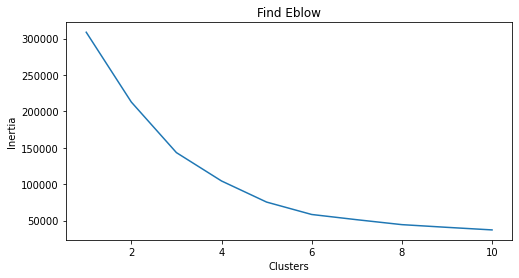

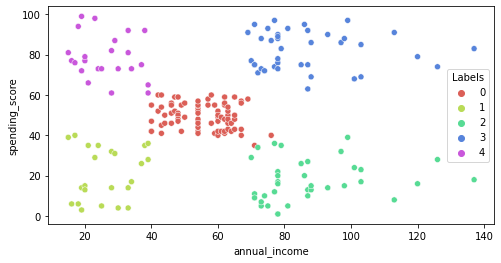

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans


df = pd.read_csv("Mall_Customers.csv")
# Mengubah data agar mudah di gunakan
df = df.rename(columns={'Gender':'gender', 'Age':'age',
                       'Annual Income (k$)':'annual_income',
                        'Spending Score (1-100)':'spending_score'})
df = df.drop(columns=['CustomerID', 'gender'], axis=1)

# proses data
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 4))
seaborn.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title("Find Eblow")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")

km5 = KMeans(n_clusters=5).fit(df)
# add lable colomn in df
df['Labels'] = km5.labels_
# Plot data
plt.figure(figsize=(8, 4))
seaborn.scatterplot(df['annual_income'],
                   df['spending_score'],
                   hue=df['Labels'],
                   palette=seaborn.color_palette('hls', 5))
plt.show()